In [262]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr
import warnings
warnings.filterwarnings('ignore')

In [263]:
# Adding dataset from GitHub:


df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [264]:
df.head(30)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [265]:
df.shape

(32560, 15)

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


<AxesSubplot:ylabel='Income'>

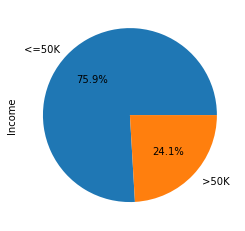

In [266]:
print(df['Income'].value_counts())
df['Income'].value_counts().plot.pie(autopct='%1.1f%%')

In [267]:
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [268]:
df.isnull().sum()

# Havving No any null values 

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [269]:
df.isin(['?']).sum(axis=0)

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [270]:
# Checking For unique values in the dataset

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [271]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# value Count Function:


In [272]:
df['Workclass'].value_counts()

# also checking for the "space" or "?" typr data
# Here we can see the soome "? " type data that we will deal later in the data processing parta

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

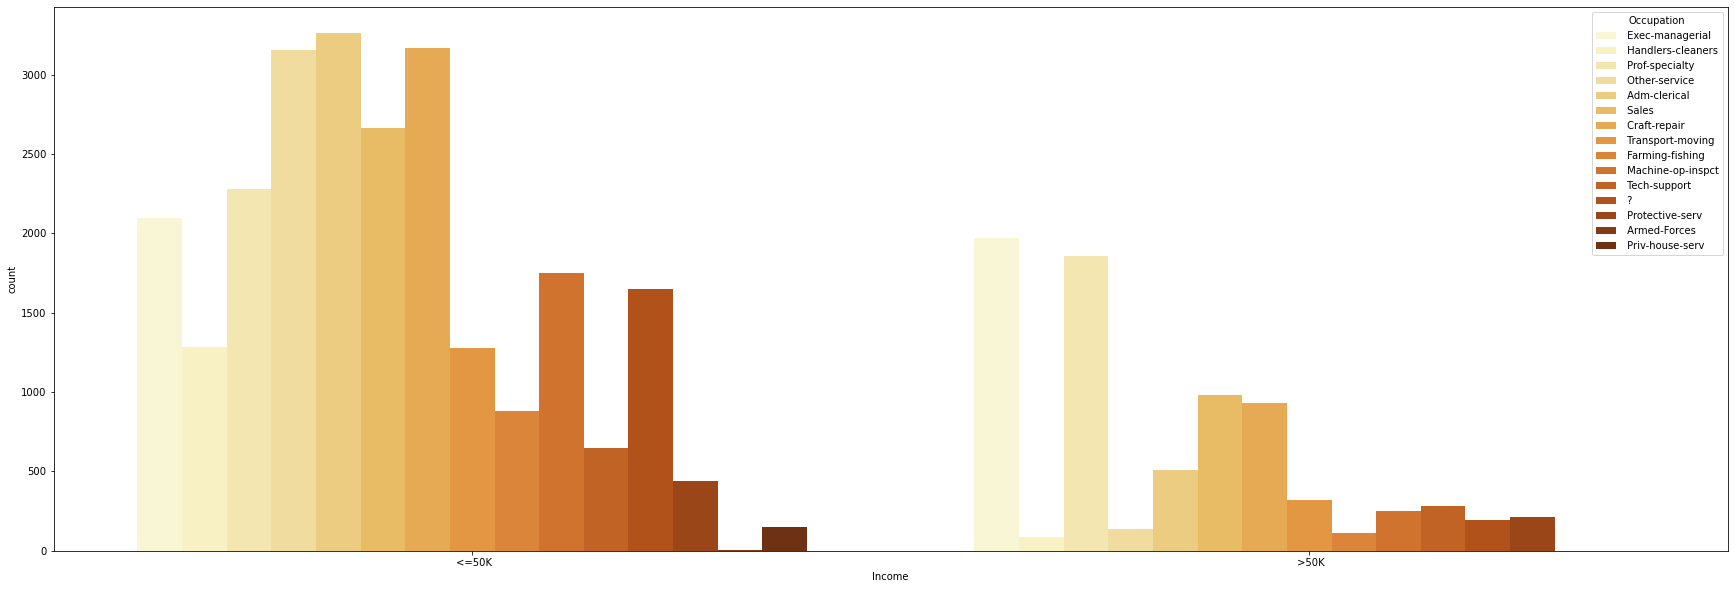

In [273]:
plt.figure(figsize=(30,10))
sns.countplot(df['Income'], palette="YlOrBr", hue='Occupation', data=df)

df['Occupation'].value_counts()

In [274]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [275]:
df['Fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

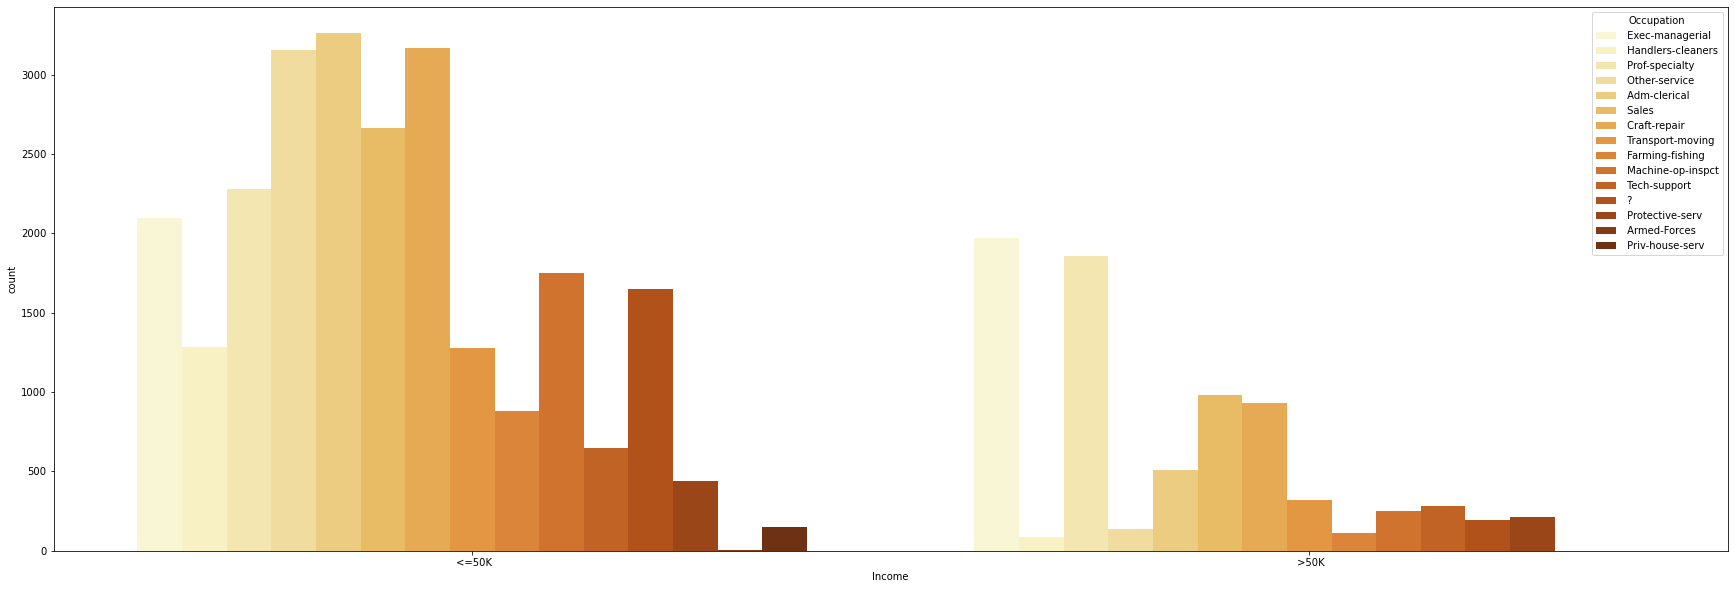

In [276]:
plt.figure(figsize=(30,10))
sns.countplot(df['Income'], palette="YlOrBr", hue='Occupation', data=df)


9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

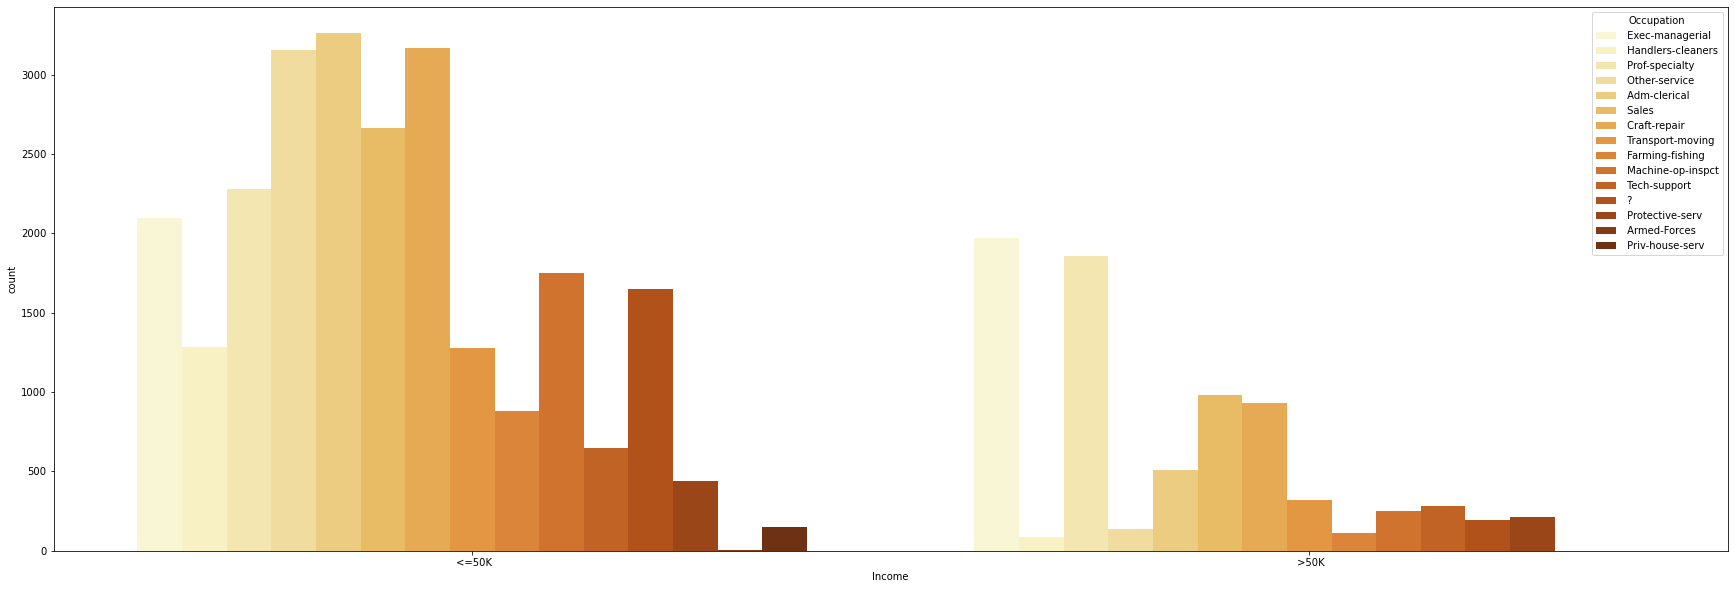

In [277]:
plt.figure(figsize=(30,10))
sns.countplot(df['Income'], palette="YlOrBr", hue='Occupation', data=df)

df['Education_num'].value_counts()

In [278]:
# I see that Education Number and Education are just the same, so, Education of them column could be droped. 
df.drop(['Education'], axis = 1, inplace = True)

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

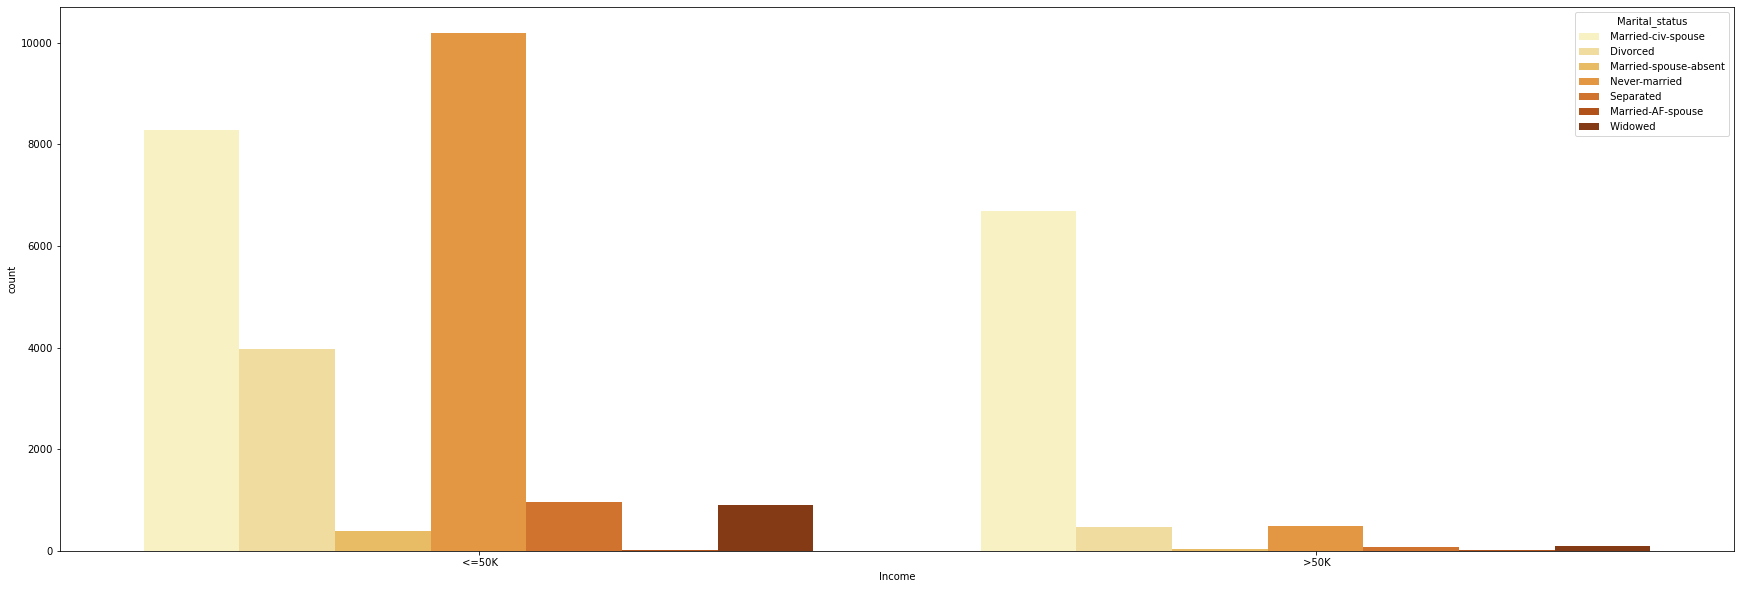

In [279]:
plt.figure(figsize=(30,10))

sns.countplot(df['Income'], palette="YlOrBr", hue='Marital_status', data=df)


df['Marital_status'].value_counts()



In [280]:
df['Hours_per_week'].value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

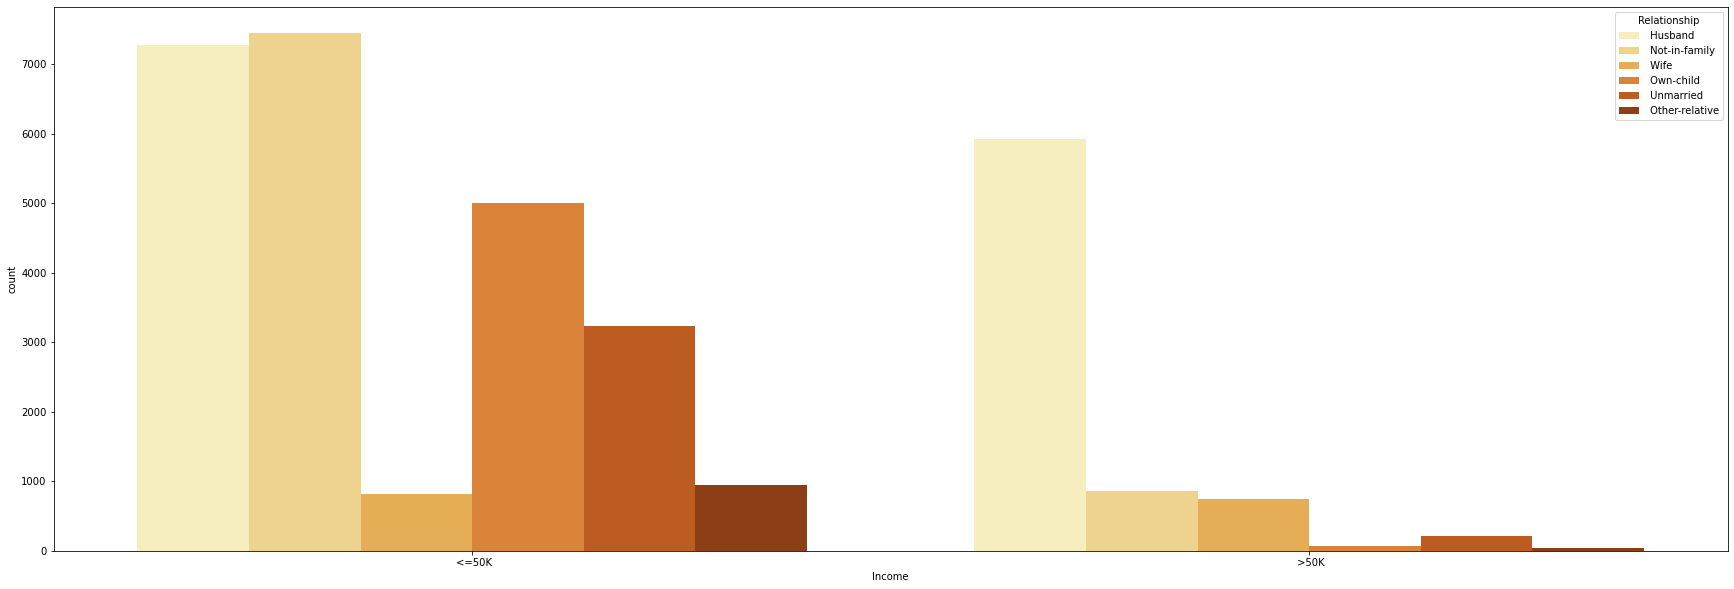

In [281]:
plt.figure(figsize=(30,10))

sns.countplot(df['Income'], palette="YlOrBr", hue='Relationship', data=df)


df['Relationship'].value_counts()

In [282]:


df['Sex'].value_counts()



 Male      21789
 Female    10771
Name: Sex, dtype: int64

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

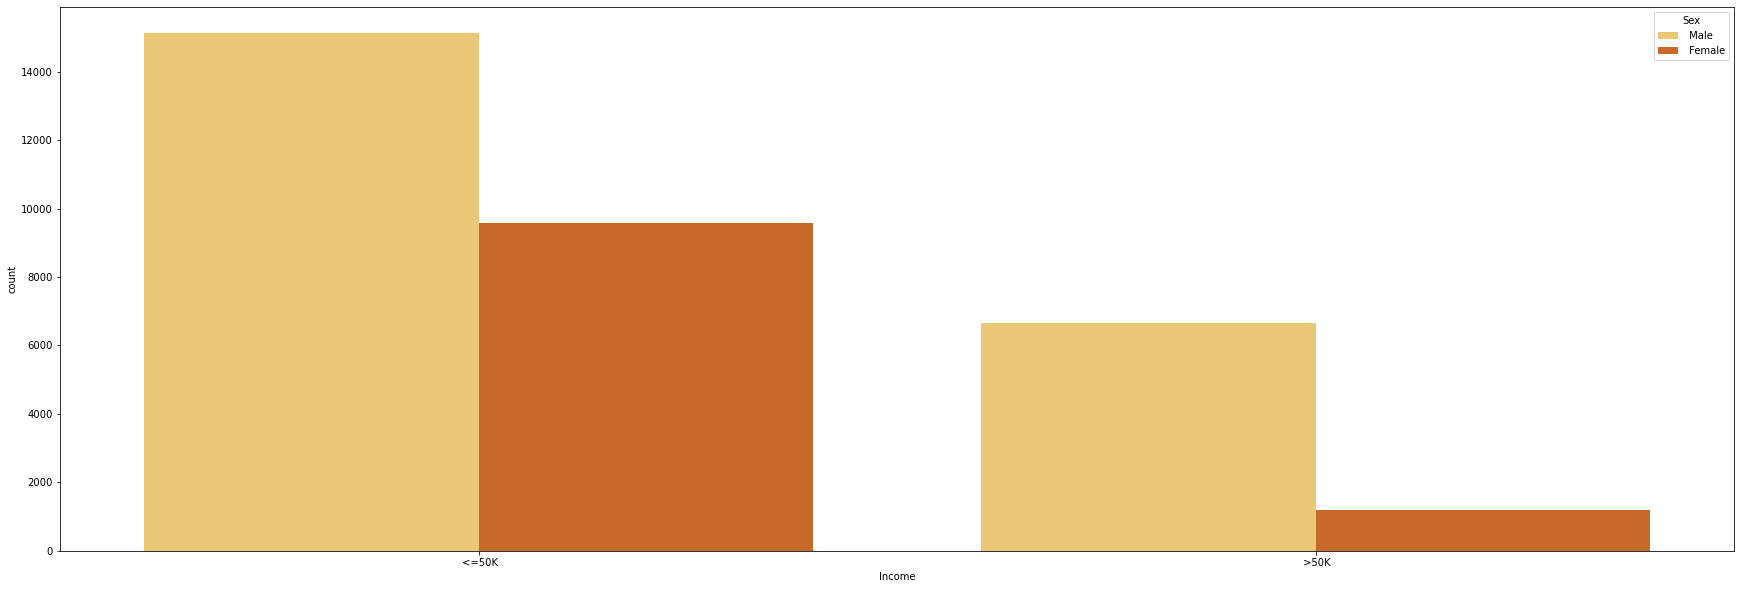

In [283]:
plt.figure(figsize=(30,10))

sns.countplot(df['Income'], palette="YlOrBr", hue='Sex', data=df)

df['Income'].value_counts()

In [284]:
df["Race"].value_counts()


 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

# Filling the "?" Values:


In [285]:
# replacing the values with the Mean, Mode, Median method:

df["Workclass"] = df["Workclass"].str.replace("?","Private")

df["Occupation"] = df["Occupation"].str.replace("?", "Prof-specialty")

df["Native_country"] = df["Native_country"].str.replace("?", "United-States")

In [286]:
df.head(20)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Feature Engineering:


In [287]:
# # For Income Status:

# # df.Income = df.Income.replace("<=50k",0)

# # df.Income = df.Income.replace(">50k",1)

df["Income"] = df["Income"].replace("<=50K", "0")
df["Income"] = df["Income"].replace(">50K", "1")

# df['target'] = df['Income']
# df['target'] = np.where(df['Income'].isin(['>50K']), 1, 0)



In [288]:
missing_values_income = df['Income'].isnull().sum()
print("Missing values in INCOME column ", missing_values_income)

Missing values in INCOME column  0


In [289]:
df.head(30)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [290]:
df.shape

(32560, 14)

Checking for Visualization:





array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

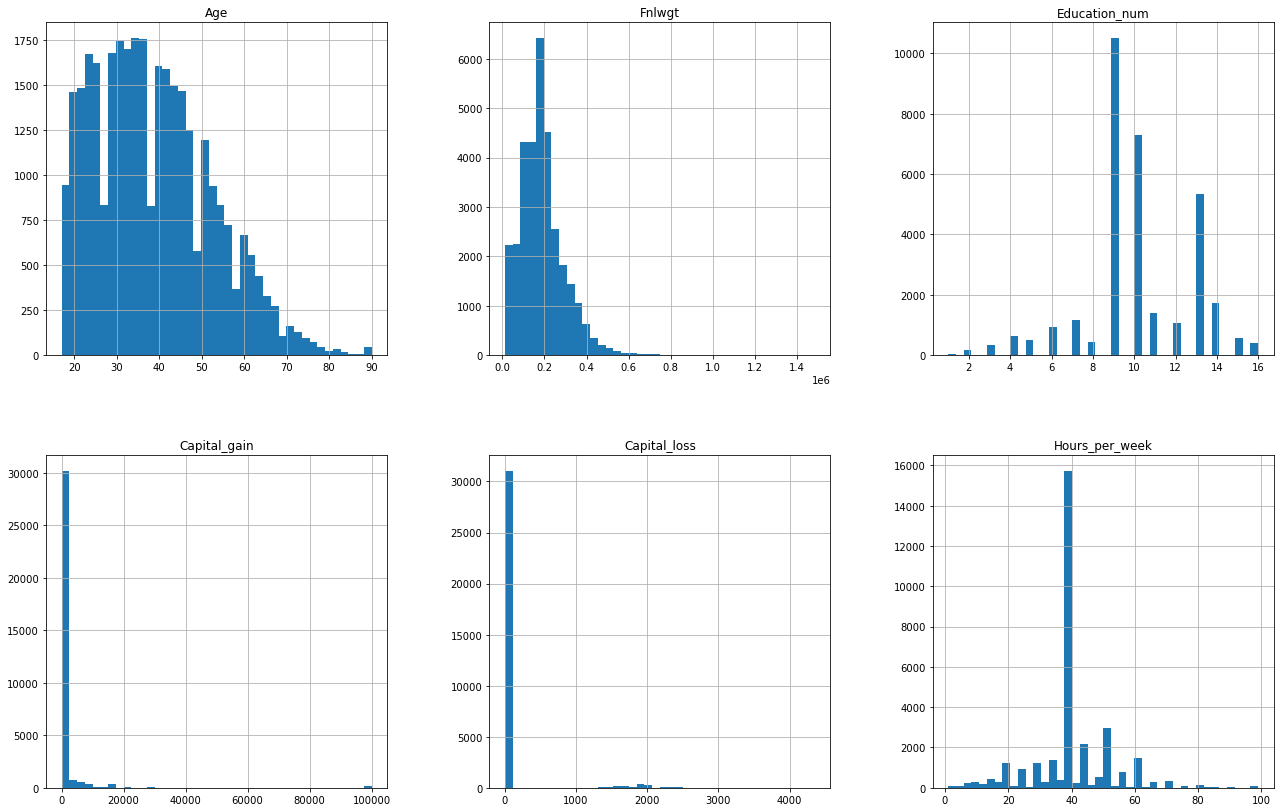

In [292]:


df.hist(figsize=(22,30), grid=True, layout=(4,3), bins=40)

CHecking For Outliners:


Age                   AxesSubplot(0.125,0.71587;0.227941x0.16413)
Fnlwgt             AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Education_num      AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Capital_gain         AxesSubplot(0.125,0.518913;0.227941x0.16413)
Capital_loss      AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Hours_per_week    AxesSubplot(0.672059,0.518913;0.227941x0.16413)
dtype: object

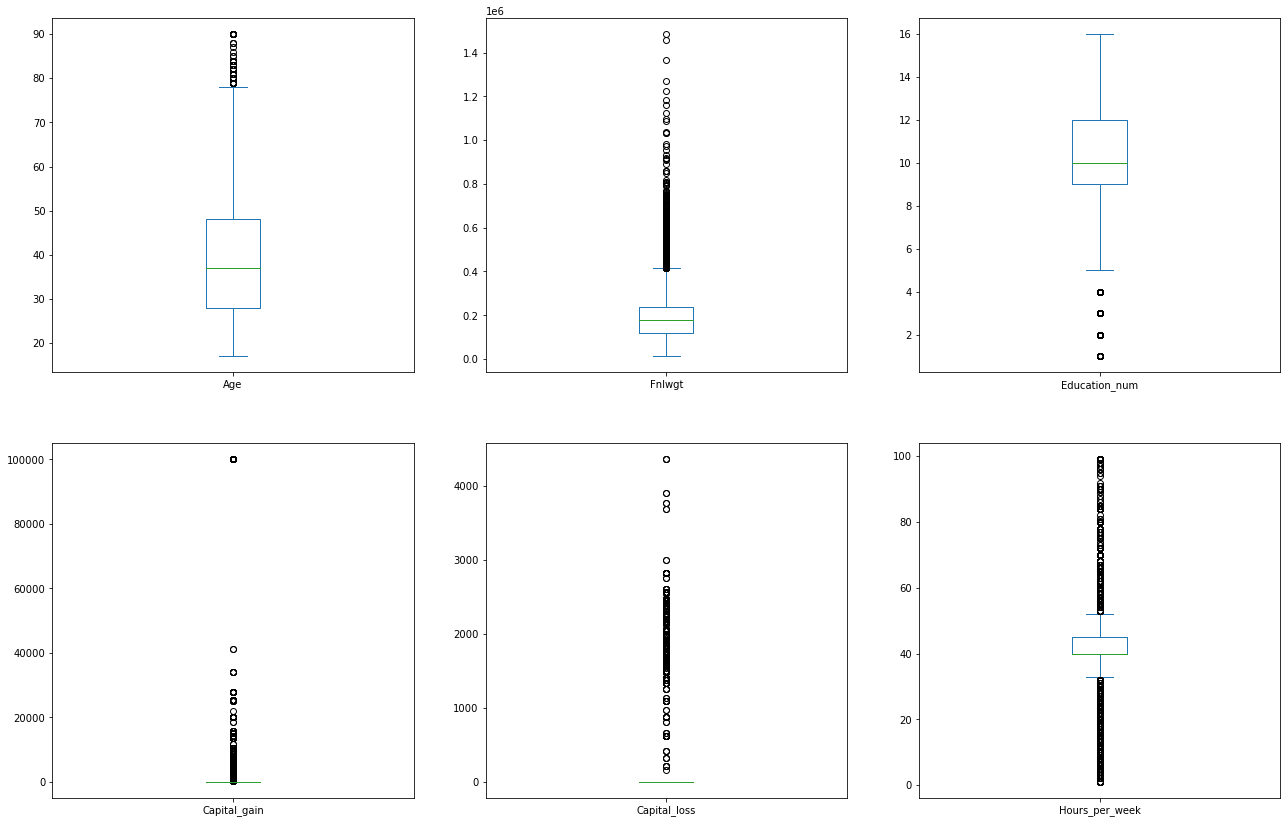

In [293]:
# checkinh for ooutliners:

df.plot(kind= 'box', figsize= (22,30), layout=(4,3), sharex=False, subplots=True)



In [294]:
# Also from visulization it is clear that age data is havving the many outliers. 
# similar this outliers are also present in the Fnlwgt, Education_num, Capital_gain, capital_looss, Hours_per_week.


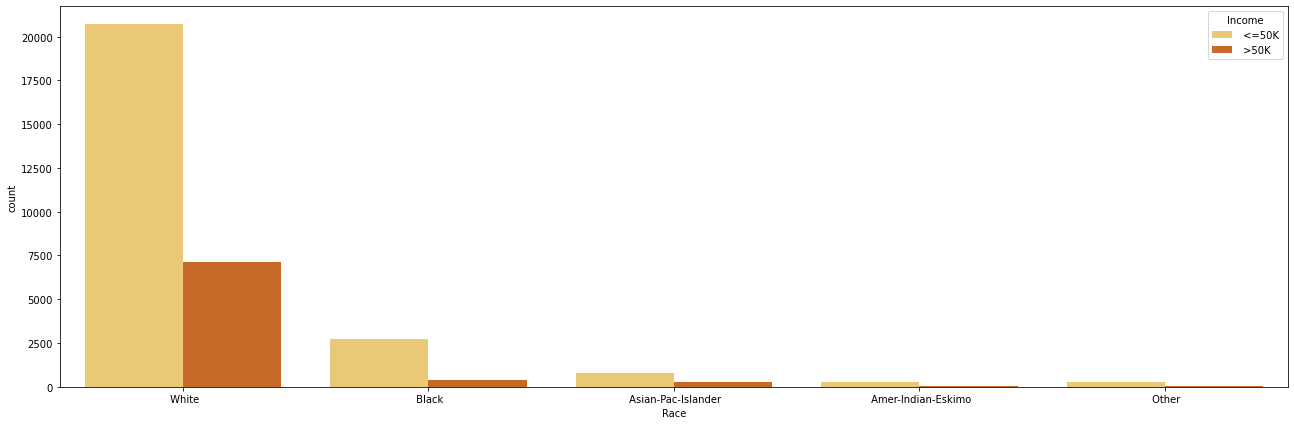

In [307]:
# Countplot for the Race column:
plt.figure(figsize=(22,7))
sns.countplot(df['Race'], hue='Income', data=df, palette="YlOrBr");


# here the White data in the Race having the more value 

In [310]:
# Feature Scaling:

from sklearn.preprocessing import StandardScaler, LabelEncoder


df1 = df.apply(LabelEncoder().fit_transform)

In [311]:
df1.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,6,2,5,0,2,1,0,0,39,38,0
3,11,3,19354,12,2,9,5,2,0,0,0,39,4,0
4,20,3,17699,13,2,3,5,4,0,0,0,39,38,0


Splitting the Data:


In [312]:
# Model Building::


x = df1.drop(['Income'], axis=1)

y = df1['Income']

In [313]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,5,2925,12,2,3,0,4,1,0,0,12,38
1,21,3,14085,8,0,5,1,4,1,0,0,39,38
2,36,3,15335,6,2,5,0,2,1,0,0,39,38
3,11,3,19354,12,2,9,5,2,0,0,0,39,4
4,20,3,17699,13,2,3,5,4,0,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16527,11,2,12,5,4,0,0,0,37,38
32556,23,3,8079,8,2,6,0,4,1,0,0,39,38
32557,41,3,7882,8,6,0,4,4,0,0,0,39,38
32558,5,3,12880,8,4,0,3,4,1,0,0,19,38


In [314]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

Data Scaling:

In [317]:
scalar = StandardScaler().fit_transform(x)
scalar

array([[ 0.83749664,  1.72133587, -1.25206002, ..., -0.20417998,
        -2.25444135,  0.26137428],
       [-0.042559  , -0.08522344,  0.59298455, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.05751055, -0.08522344,  0.79964277, ..., -0.20417998,
        -0.03112222,  0.26137428],
       ...,
       [ 1.42420039, -0.08522344, -0.43253619, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-1.21596651, -0.08522344,  0.39376603, ..., -0.20417998,
        -1.67802528,  0.26137428],
       [ 0.98417258,  0.81805622,  1.21114062, ..., -0.20417998,
        -0.03112222,  0.26137428]])

In [319]:
print(x.shape)

print(y.shape)

(32560, 13)
(32560,)


Finding the Model:


In [320]:
# finding the best model :

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 0)


Logistic Regression

In [323]:
# Logistic Regression:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

lr = LogisticRegression()

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)


print("Accurscy on training data: {:,.3f} ".format(lr.score(x_train, y_train)))
print("Accurscy on test data: {:,.3f} ".format(lr.score(x_test, y_test)))


Accurscy on training data: 0.806 
Accurscy on training data: 0.808 


In [324]:
# Here we can see that on training data set we get 80.6% accuracy.
# Here we can see that on test data set we get 80.8% accuracy.


Random Forest Classifier:


In [326]:
# Random Forest Classifier::

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(x_train, y_train)

predictiion1 = model1.predict(x_train)


print("Accurscy on training data: {:,.3f} ".format(rfc.score(x_train, y_train)))
print("Accurscy on test data: {:,.3f} ".format(rfc.score(x_test, y_test)))



Accurscy on training data: 1.000 
Accurscy on test data: 0.859 


In [ ]:
# here we can see that with RFC we get 100% accuracy on training data set. 
# also we can see that with RFC we get 85.9% accuracy on testing data set.
# So we can get the best MOdel of Random Forest classifier for our data set.  


In [327]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




In [331]:
matrix = confusion_matrix(y_test, rfc.predict(x_test))
matrix

array([[4631,  326],
       [ 589,  966]])

In [334]:
print(classification_report(y_test, rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4957
           1       0.75      0.62      0.68      1555

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [335]:
# Precision : tp/(tp+fp)

print("Precision=" , 4631/(4631+589))

Precision= 0.8871647509578544


In [336]:
# Recall : tp/ (tp+fn)

print("Recall = " , 4631/(4631+326))

Recall =  0.9342344159774056


Cross Validation :


In [338]:
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(rfc, x, y, cv=19)
print("cross avlidation score of Randoom Forest Classifier Model : ", cvs.mean())

cross avlidation score of Randoom Forest Classifier Model :  0.858262491521551


Hyper Parameter Tunning:


In [339]:
RandomForestClassifier()

RandomForestClassifier()

In [340]:
from sklearn.model_selection import GridSearchCV

# creating parameter list:
parameters = {'max_features' : ['auto', 'sqrt','log2'],
              'max_depth' : [4,5,6,7,8] ,
              'criterion' : ['gini', 'entropy']
             }

In [341]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=19,scoring = 'accuracy')

GCV.fit(x_train, y_train)

GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [342]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [343]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8)

In [344]:
# predicting test with best parameters:

GCV_pred = GCV.best_estimator_.predict(x_test)

# Checking the final accuracy:

accuracy_score(y_test, GCV_pred)


0.8556511056511057

AUC ROC Curve:

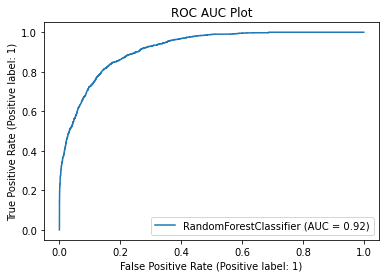

In [345]:
# Plotting the AUC ROC Curve:

from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_, x_test, y_test)
plt.title("ROC AUC Plot")
plt.show()

Model Saving:


In [346]:
import pickle
filename = 'Census.pkl'
pickle.dump(lr, open(filename, 'wb'))